<a href="https://colab.research.google.com/github/Zwarzen/PCVK_Genap_2022/blob/main/week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import cv2 as cv 
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import io
import math
import os
import glob
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


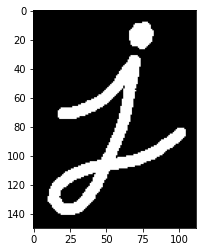

In [2]:
gambar_j = cv.imread('/content/drive/MyDrive/Images/j.png') # Baca Gambar
plt.imshow(gambar_j)

# Dilasi

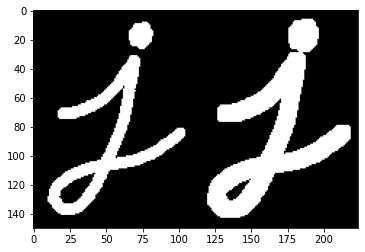

In [3]:
kernel = np.ones((5,5),np.uint8) # beri kernel 5x5
dilasi = cv.dilate(gambar_j,kernel,iterations = 1) # cv.dilate = fungsi dilasi

final_frame = cv.hconcat((gambar_j, dilasi))
plt.imshow(final_frame)



# Erosi

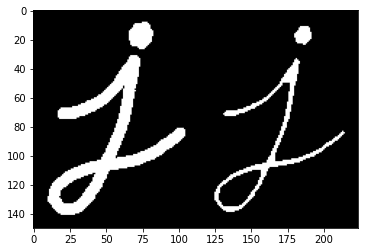

In [4]:
erosi = cv.erode(gambar_j,kernel,iterations = 1) # cv.erode = fungsi erosi (gambar, beri kernel, iterasi = 1)

final_frame = cv.hconcat((gambar_j, erosi))
plt.imshow(final_frame)

# Open Operation

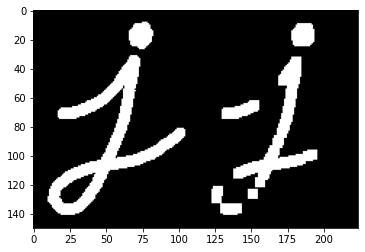

In [5]:
kernel_7 = np.ones((7,7),np.uint8) # beri kernel 7x7, np.uint berfungsi sebagai mendefinisikan integer 8 bit
opening = cv.morphologyEx(gambar_j, cv.MORPH_OPEN, kernel_7)

final_frame = cv.hconcat((gambar_j, opening))
plt.imshow(final_frame)

# Closing Operation

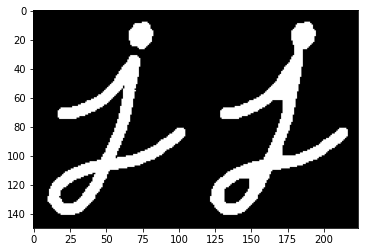

In [6]:
closing = cv.morphologyEx(gambar_j, cv.MORPH_CLOSE, kernel_7) # cv.morphologyEx(gambar, memberikan fungsi morph close, definisi kernel)

final_frame = cv.hconcat((gambar_j, closing))
plt.imshow(final_frame)

# Cross Dilation

In [12]:
Cross_3x3 = cv.getStructuringElement(cv.MORPH_CROSS,(3,3)) # kernel cross 3x3
Cross_5x5 = cv.getStructuringElement(cv.MORPH_CROSS,(5,5)) # kernel cross 5x5

SED = Cross 3


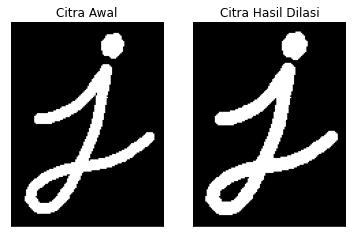

SED = Cross 5


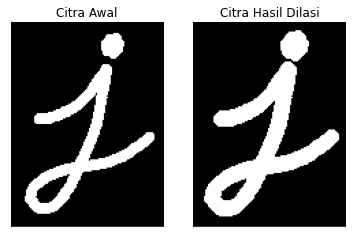

In [20]:
#opersi dilasi
dilasi_cross3x3 = cv.dilate(gambar_j,Cross_3x3,iterations = 1)
dilasi_cross5x5 = cv.dilate(gambar_j,Cross_5x5,iterations = 1)

print('SED = Cross 3') 
plt.subplot(121),plt.imshow(gambar_j),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi_cross3x3),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

print('SED = Cross 5') 
plt.subplot(121),plt.imshow(gambar_j),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi_cross5x5),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

# Circular Dilation

SED = Cross 3


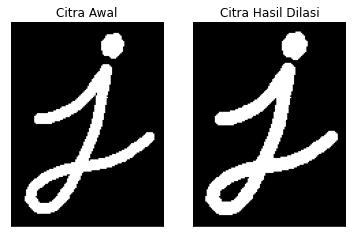

SED = Cross 5


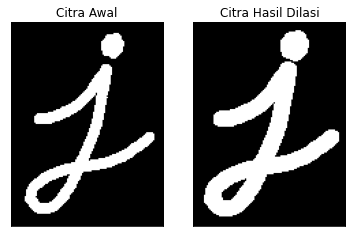

In [21]:
Circular_3x3 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3)) # kernel circular 3x3
Circular_5x5 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5)) # kernel circular 5x5

#opersi dilasi
dilasi_circular3x3 = cv.dilate(gambar_j,Circular_3x3,iterations = 1)
dilasi_circular5x5 = cv.dilate(gambar_j,Circular_5x5,iterations = 1)

print('SED = Cross 3') 
plt.subplot(121),plt.imshow(gambar_j),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi_circular3x3),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

print('SED = Cross 5') 
plt.subplot(121),plt.imshow(gambar_j),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi_circular5x5),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()


# Rectangle Erode

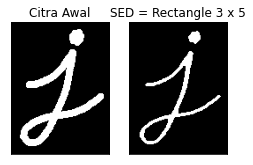

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

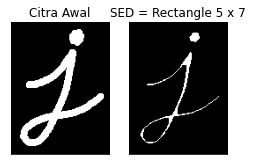

In [22]:
Rectangle_3x5 = cv.getStructuringElement(cv.MORPH_RECT,(3,5)) # kernel rectangular 3x5
Rectangle_5x7 = cv.getStructuringElement(cv.MORPH_RECT,(5,7)) # kernel rectangular 3x5

# operasi Erode
erosi_3x5 = cv.erode(gambar_j,Rectangle_3x5,iterations = 1)
erosi_5x7 = cv.erode(gambar_j,Rectangle_5x7,iterations = 1)

plt.subplot(131), plt.imshow(gambar_j), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(erosi_3x5), plt.title('SED = Rectangle 3 x 5')
plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(131), plt.imshow(gambar_j), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(erosi_5x7), plt.title('SED = Rectangle 5 x 7')
plt.xticks([]), plt.yticks([])

# Terlihat jika Rectangle 3 x 5 lebih tebal daripada Rectangle 5 x 7

# Vertical Line

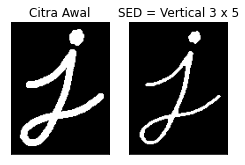

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

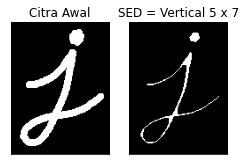

In [25]:
Line_vertikal3 = cv.getStructuringElement(cv.MORPH_RECT, (3,5)) # Kernel Line Vertical 1x3
Line_vertikal5 = cv.getStructuringElement(cv.MORPH_RECT, (5,7)) # kernel Line Vertical 1x5

# Operasi Erode Line Vertical
erosi_3x5 = cv.erode(gambar_j,Line_vertikal3,iterations = 1)
erosi_5x7 = cv.erode(gambar_j,Line_vertikal5,iterations = 1)

plt.subplot(131), plt.imshow(gambar_j), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(erosi_3x5), plt.title('SED = Vertical 3 x 5')
plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(131), plt.imshow(gambar_j), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(erosi_5x7), plt.title('SED = Vertical 5 x 7')
plt.xticks([]), plt.yticks([])

# Terlihat jika Vertical 3 x 5 lebih tebal daripada Vertical 5 x 7

# Source : 
https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

https://docs.opencv.org/3.4/d4/d76/tutorial_js_morphological_ops.html